In [302]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import finpy_tse as fpy

In [303]:
def sabeghe_RiskFree():
    """
    سابقه قیمتی نماد صندوق درامد ثابت یاقوت
    """ 
    shatran=fpy.Get_Price_History(
        stock="یاقوت",
        start_date='1399-01-27',
        end_date='1402-12-28',
        ignore_date=False,
        adjust_price=True,
        show_weekday=False,
        double_date=False)
    
    return shatran[["Ticker","Adj Close"]]

RF=sabeghe_RiskFree()

d:\data science MBA\آموزش\webscrappy\web_scarap\shares_return\env\Lib\site-packages\finpy_tse\__init__.py:424: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  df_history = pd.concat([df_history,df_temp])


In [304]:
def sabeghe_Index(): 
    """
    سابقه قیمتی شاخص کل
    """ 
    shakheskol=fpy.Get_CWI_History(
        start_date='1399-01-27',
        end_date='1402-12-28',
        ignore_date=False,
        just_adj_close=True,
        show_weekday=False,
        double_date=False)
    return shakheskol

Index=sabeghe_Index()

In [305]:
def sabeghe_shatran():
    """
    سابقه قیمتی نماد شتران
    """ 
    shatran=fpy.Get_Price_History(
        stock='شتران',
        start_date='1399-01-27',
        end_date='1402-12-28',
        ignore_date=False,
        adjust_price=True,
        show_weekday=False,
        double_date=False)
    
    return shatran[["Ticker","Adj Close"]]

shatran=sabeghe_shatran()

d:\data science MBA\آموزش\webscrappy\web_scarap\shares_return\env\Lib\site-packages\finpy_tse\__init__.py:424: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  df_history = pd.concat([df_history,df_temp])


In [306]:
def sabeghe_shasta():
    """
    سابقه قیمتی نماد شستا
    """ 
    shasta=fpy.Get_Price_History(
        stock='شستا',
        start_date='1399-01-27',
        end_date='1402-12-28',
        ignore_date=False,
        adjust_price=True,
        show_weekday=False,
        double_date=False)
    
    return shasta[["Ticker","Adj Close"]]
shasta=sabeghe_shasta()

d:\data science MBA\آموزش\webscrappy\web_scarap\shares_return\env\Lib\site-packages\finpy_tse\__init__.py:424: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  df_history = pd.concat([df_history,df_temp])


In [307]:
def sabeghe_kerman():
    """
    سابقه قیمتی نماد کرمان
    """ 
    kerman=fpy.Get_Price_History(
        stock='کرمان',
        start_date='1399-01-27',
        end_date='1402-12-28',
        ignore_date=False,
        adjust_price=True,
        show_weekday=False,
        double_date=False)
    
    return kerman[["Ticker","Adj Close"]]
kerman=sabeghe_kerman()

d:\data science MBA\آموزش\webscrappy\web_scarap\shares_return\env\Lib\site-packages\finpy_tse\__init__.py:424: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  df_history = pd.concat([df_history,df_temp])


In [308]:
def eda_portfo():
    """
    تمیز کردن دیتا 
    """ 
   
    portfo_2= shatran.merge(shasta,on=["J-Date"],how="outer")
    portfo_3= portfo_2.merge(kerman,on=["J-Date"],how="outer")
    portfo_3= portfo_3.drop(["Ticker_x","Ticker_y","Ticker"],axis=1).rename(columns={"Adj Close_x":"Adj Close_shatran","Adj Close_y":"Adj Close_shasta","Adj Close":"Adj Close_kerman"})
    portfo_shakhes=Index.merge(portfo_3,on=["J-Date"],how="outer").rename(columns={"Adj Close":"Adj Close_Index"})
    portfo_RiskFree=RF.merge(portfo_shakhes, on=["J-Date"],how="outer").drop(["Ticker"],axis=1).rename(columns={"Adj Close":"Adj Close_RiskFree"}).bfill()
    
    portfo= portfo_RiskFree.ffill()
    
    return  portfo.sort_values(by="J-Date",ascending= False)

portfolio=eda_portfo()

In [309]:
def portfo_return():
    """
     احتساب 21 روز کاری در ماه و بدست اوردن بازده ماهانه و تبدیل به یازده سالانه 
    """
    return (portfolio.pct_change(periods=-21))*12

annual_return=portfo_return()

In [310]:
AR_portfo=annual_return.drop(["Adj Close_Index","Adj Close_RiskFree"],axis=1)

In [311]:
def annual_expected_return():
    """
    بدست آوردن بازده موردانتظار پرتفو بدون شاخص کل از میانگین بازده سالانه 
    """
    return (AR_portfo.mean())
ER=annual_expected_return()
ER

Adj Close_shatran    0.615861
Adj Close_shasta     0.529879
Adj Close_kerman     0.245885
dtype: float64

In [312]:
def annual_risk():
    """
    بدست آوردن انحراف معیار (ریسک سالیانه)
    """
    return (AR_portfo.std(ddof=1))
Risk=annual_risk()
Risk

Adj Close_shatran    3.167134
Adj Close_shasta     2.590583
Adj Close_kerman     2.564598
dtype: float64

In [313]:
def annual_variance():
    """  
    بدست آوردن واریانس
    """
    return (AR_portfo.var(ddof=1))
var=annual_variance()
var

Adj Close_shatran    10.030735
Adj Close_shasta      6.711120
Adj Close_kerman      6.577161
dtype: float64

In [314]:
def annual_covariance():
    """
    بدست آوردن کواریانس
    """
    return (AR_portfo.cov())
cov=annual_covariance()
cov

,Adj Close_shatran,Adj Close_shasta,Adj Close_kerman
Adj Close_shatran,10.030735,6.943090,5.341198
Adj Close_shasta,6.943090,6.711120,4.715689
Adj Close_kerman,5.341198,4.715689,6.577161


In [315]:
def annual_correlation():
    """
    بدست آوردن کورلیشن
    """
    return AR_portfo.corr()
corr=annual_correlation()
corr

,Adj Close_shatran,Adj Close_shasta,Adj Close_kerman
Adj Close_shatran,1.000000,0.846231,0.657587
Adj Close_shasta,0.846231,1.000000,0.709788
Adj Close_kerman,0.657587,0.709788,1.000000


In [316]:
def weights_three_asset():
    """
     محاسبه وزن های سهام باالگوی کم و زیاد کردن 5درصد
    """

    data=np.arange(0, 105, 5, dtype=int)

    list=[]
    for x in (data):
              
        for y in (data):
                 
            for z in (data):
                
                x=100-y-z
                y=100-x-z 
                z=100-y-x
                  
                if x>=0 and y>=0 and z>=0:
                    list.append([x,y,z])
                              
    return list
                    
            
Weights=(pd.DataFrame(weights_three_asset()).drop_duplicates() )/100
Weights=Weights. rename(columns={0:"shatran_weight",1:"shasta_weight",2:"kerman_weight"}) 
Weights
                   

,shatran_weight,shasta_weight,kerman_weight
0,1.00,0.00,0.00
1,0.95,0.00,0.05
2,0.90,0.00,0.10
3,0.85,0.00,0.15
4,0.80,0.00,0.20
...,...,...,...
226,0.05,0.90,0.05
227,0.00,0.90,0.10
228,0.05,0.95,0.00
229,0.00,0.95,0.05


In [317]:
def portfo_return():
    """
    بدست آوردن بازده کل پرتفو با اوزان مختلف به درصد
    """
    return pd.DataFrame(np.array(Weights).dot(np.array(ER)))

PER=portfo_return()

In [318]:
def portfo_risk():

    risk_pow_2=Risk**2
    Weights_pow_2=Weights**2
    part_1=pd.DataFrame(np.array(Weights_pow_2).dot(np.array(risk_pow_2)))
    part_2=pd.DataFrame(2*((Weights.iloc[0:,0]*Weights.iloc[0:,1]*cov.iloc[0,1])+(Weights.iloc[0:,1]*Weights.iloc[0:,2]*cov.iloc[1,2])+(Weights.iloc[0:,0]*Weights.iloc[0:,2]*cov.iloc[0,2])))
    return part_1 + part_2
PR=portfo_risk() 

In [319]:
def sharp_ratio():
    """
    بدست آوردن نسبت شارپ با دارایی بدون ریسک 
    """
    return (PER -(annual_return["Adj Close_RiskFree"]).mean())/(PR)

SRP=sharp_ratio()

In [320]:
def concat():
    """
    دیتافریمی از  ریسک و بازده پرتفو و نسبت شارپ
    """
    df=pd.concat([Weights,PER.rename({0:"Portfo_Return"},axis=1)],axis=1)
    df1=pd.concat([df,PR.rename({0:"Portfo_Risk"},axis=1)],axis=1)
    df2=pd.concat([df1,SRP.rename({0:"Sharp_Ratio"},axis=1)],axis=1)
    return df2
df_portfolio=concat()
df_portfolio

,shatran_weight,shasta_weight,kerman_weight,Portfo_Return,Portfo_Risk,Sharp_Ratio
0,1.00,0.00,0.00,0.615861,10.030735,0.040671
1,0.95,0.00,0.05,0.597363,9.576595,0.040668
2,0.90,0.00,0.10,0.578864,9.152082,0.040534
3,0.85,0.00,0.15,0.560365,8.757198,0.040249
4,0.80,0.00,0.20,0.541866,8.391940,0.039796
...,...,...,...,...,...,...
226,0.05,0.90,0.05,0.519978,6.553523,0.047620
227,0.00,0.90,0.10,0.501480,6.350603,0.046229
228,0.05,0.95,0.00,0.534178,6.741456,0.048399
229,0.00,0.95,0.05,0.515679,6.521219,0.047197


In [321]:
def min_variance_portfo():
    """
    بدست آوردن سبد با کمترین ریسک
    """
    return df_portfolio[df_portfolio["Portfo_Risk"]==df_portfolio["Portfo_Risk"].min()]
mvp=min_variance_portfo()
mvp

,shatran_weight,shasta_weight,kerman_weight,Portfo_Return,Portfo_Risk,Sharp_Ratio
175,0.0,0.5,0.5,0.387882,5.679915,0.031688


In [322]:
def max_sharp_ratio():
    """
    بدست آوردن سبد با بیشترین نسبت شارپ
    """
    return df_portfolio[df_portfolio["Sharp_Ratio"]==df_portfolio["Sharp_Ratio"].max()]
BSRP=max_sharp_ratio()
BSRP

,shatran_weight,shasta_weight,kerman_weight,Portfo_Return,Portfo_Risk,Sharp_Ratio
210,0.25,0.75,0.0,0.551375,7.005584,0.049029


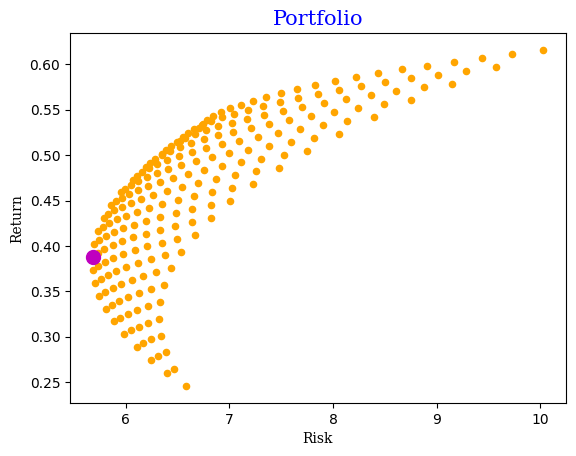

In [323]:
def efficent_frontier_chart():
    """
    نمودار مربوط به بازده و ریسک پرتفو باوزن های مختلف 
    با نشان دادن کمترین مقدار ریسک
    """
   
    df_portfolio.plot.scatter(x='Portfo_Risk',
                       y='Portfo_Return',
                      c='orange')
    plt.plot(np.array(mvp[["Portfo_Risk"]]),np.array(mvp[["Portfo_Return"]]),'o:m' ,ms=10)

    font1 = {'family':'serif','color':'blue','size':15}
    font2 = {'family':'serif','color':'black','size':10}

    plt.title("Portfolio", fontdict = font1)
    plt.xlabel("Risk", fontdict = font2)
    plt.ylabel("Return", fontdict = font2)
    
    return plt.show()
EF_chart=efficent_frontier_chart()
EF_chart

In [324]:
def Weights_Index_RiskFree():

    """
     محاسبه وزن های سبد ریسکی و دارایی بدون ریسک باالگوی کم و زیاد کردن 5درصد
    """

    data=np.arange(5, 110, 5, dtype=int)

    list=[]
    
    for x in (data):
       
        for y in (data):
            
            if  x<0 or x>=0 :
                x=x-5
                y=100-x
                
                
                
                list.append([x,y])
                  
    return list
                    
            
Weights=(pd.DataFrame(Weights_Index_RiskFree()).drop_duplicates()).reset_index()
Weights_RiskFree_Index=((Weights.rename(columns={0:"RF_weight",1:"index_weight"})).drop("index",axis=1))/100

In [325]:
BSRP[["Portfo_Return"]]

,Portfo_Return
210,0.551375


In [326]:
np.array([annual_return[["Adj Close_RiskFree"]].mean(),BSRP["Portfo_Return"]])

array([[0.20789783],
       [0.55137466]])

In [327]:
def expected_return_sharo_ratio_freerisk():
    """
    بدست آوردن بازده مورد انتظار بیشترین تسبت شارپ و دارایی بدون ریسک
    """
    ER=np.array([annual_return[["Adj Close_RiskFree"]].mean(),BSRP["Portfo_Return"]])
    return pd.DataFrame(Weights_RiskFree_Index).dot(np.array(ER))

ERIRF=expected_return_sharo_ratio_freerisk().rename({0:"expected_return"},axis=1)

In [328]:
def risk_sharp_ratio():
    """
    بدست آوردن رسیک باییشترین نسبت شارپ
    """

    RI=np.array(BSRP[["Portfo_Risk"]])
    return (np.array(Weights_RiskFree_Index["index_weight"])*RI).T

RIRF=pd.DataFrame(risk_sharp_ratio()).rename({0:"Index_Risk"},axis=1)

In [329]:
def concat():
    """
    دیتافریمی از ریسک و بازده بیشترین نسبت شارپ و دارایی بدون ریسک
    """
    return pd.concat([ERIRF,RIRF],axis=1)
cml=concat()

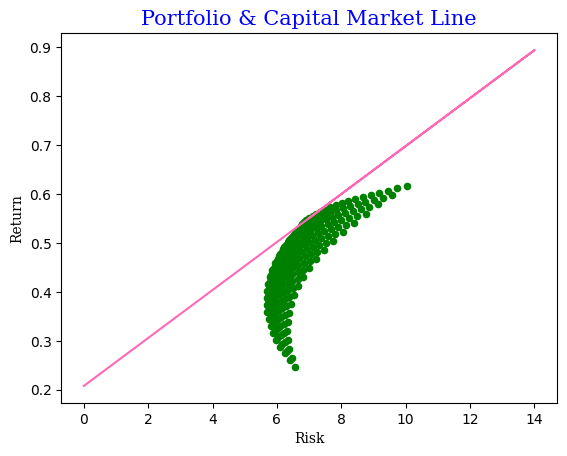

In [330]:
def capital_market_line_chart():
    """
    تلاقی نمودار پرتفوی چند سهمی با خط بازار سرمایه از بازده و ریسک بیشترین نسبت شارپ باوزن های مختلف
    """
    df_portfolio.plot.scatter(x='Portfo_Risk',
                       y='Portfo_Return',
                      c='Green')
    plt.plot(cml["Index_Risk"],cml["expected_return"], c = 'hotpink')
    
    font1 = {'family':'serif','color':'blue','size':15}
    font2 = {'family':'serif','color':'black','size':10}

    plt.title("Portfolio & Capital Market Line", fontdict = font1)
    plt.xlabel("Risk", fontdict = font2)
    plt.ylabel("Return", fontdict = font2)

    return plt.show()

    
EF_chart=capital_market_line_chart()
EF_chart

 خط بازار اوراق بهادار (capital asset pricing model)(مدل قیمت گذاری دارایی سرمایه ای) (sequrity market line)

In [331]:
def Beta_sensitivity_coefficient_weights():
    return np.arange(0,10,0.1)
Beta_Weight=np.array(Beta_sensitivity_coefficient_weights())
Beta_Weight

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

In [332]:
var_Index=annual_return.var()
#var_Index["Adj Close_Index"]
var_Index

Adj Close_RiskFree     0.004860
Adj Close_Index        2.447319
Adj Close_shatran     10.030735
Adj Close_shasta       6.711120
Adj Close_kerman       6.577161
dtype: float64

In [333]:
def Beta_sensitivity_coefficient():
    cov_Index=annual_return.cov()
    var_Index=annual_return.var()
    cov_index_shatran=cov_Index.iloc[1,2]
    cov_index_shasta=cov_Index.iloc[1,3]
    cov_index_kerman=cov_Index.iloc[1,4]
    Beta_shatran=pd.DataFrame([cov_index_shatran/var_Index["Adj Close_Index"]]).rename({0:"Beta_shatran"},axis=1)
    Beta_shasta=pd.DataFrame([cov_index_shasta/var_Index["Adj Close_Index"]]).rename({0:"Beta_shasta"},axis=1)
    Beta_kerman=pd.DataFrame([cov_index_kerman/var_Index["Adj Close_Index"]]).rename({0:"Beta_kerman"},axis=1)
    return pd.concat([Beta_shatran,Beta_shasta,Beta_kerman],axis=1)

BETA=Beta_sensitivity_coefficient()
np.array(BETA ["Beta_shatran"])

array([1.75608809])

In [334]:
#Eri=Rf+β(ERm-Rf)
def expected_return_market_assetriskfree():
    """
    بدست آوردن بازده موردانتطار یا مورد نیاز با ریسک شاخص و ضریب بتا
    """
    RF=annual_return["Adj Close_RiskFree"].mean()
    ERI=annual_return["Adj Close_Index"].mean()
    return RF+(Beta_Weight*(ERI-RF))

ERi=pd.DataFrame(expected_return_market_assetriskfree()).rename({0:"expected_return"},axis=1)


<function matplotlib.pyplot.show(close=None, block=None)>

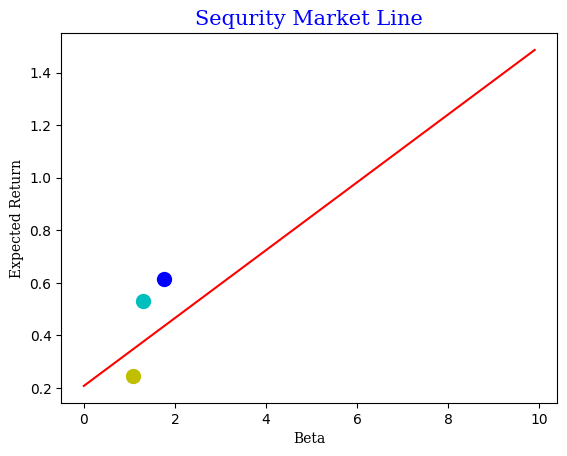

In [354]:
def sequrity_market_line():

    plt.plot(pd.DataFrame(Beta_Weight),ERi,c = 'red')
    plt.plot(np.array(BETA[["Beta_shatran"]]),np.array(ER["Adj Close_shatran"]),"o:b",ms=10 )# under value ارزش داتی ان بیشتر از بازار است، انقدر خریده می شود تا قیمت ان پایین بیاید و روی خظ بازار  قرار بگیرد
    plt.plot(np.array(BETA[["Beta_shasta"]]),np.array(ER["Adj Close_shasta"]),"o:c",ms=10 )# under value ارزش داتی ان بیشتر از بازار است، انقدر خریده می شود تا قیمت ان پایین بیاید و روی خظ بازار  قرار بگیرد
    plt.plot(np.array(BETA[["Beta_kerman"]]),np.array(ER["Adj Close_kerman"]),"o:y",ms=10 )# over value ارزش داتی ان کمتر از بازار است، انقدر فروخته می شود تا قیمت ان بالا بیاید و روی خظ بازار  قرار بگیرد
    
    font1 = {'family':'serif','color':'blue','size':15}
    font2 = {'family':'serif','color':'black','size':10}

    plt.title("Sequrity Market Line", fontdict = font1)
    plt.xlabel("Beta", fontdict = font2)
    plt.ylabel("Expected Return", fontdict = font2)
    return plt.show
SML=sequrity_market_line()
SML